In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

# %matplotlib inline
# from __future__ import division
import pandas as pd
from IPython.display import Image

# Problem 1: Feedforward: Building a ReLU neural network

1.1 Network Schema

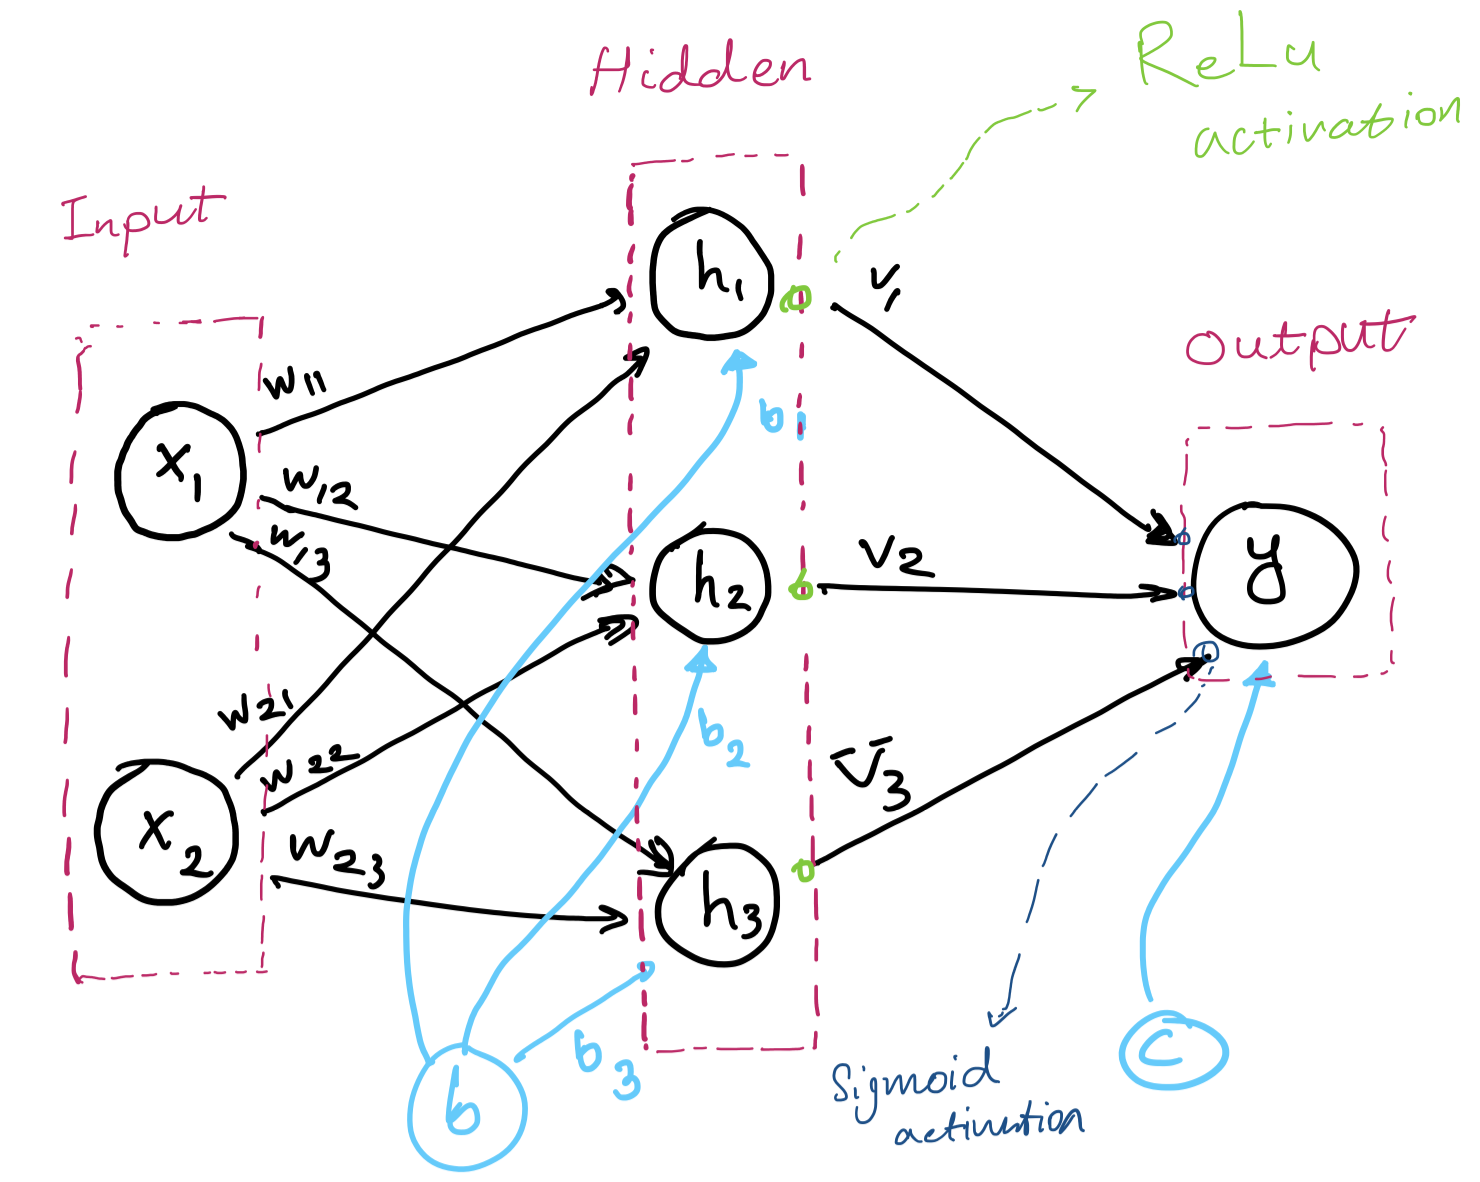

In [171]:
Image('1.png', width=600)

1.2

\begin{align}
    h_1 = max( 0, w_{11}x_1 + w_{21}x_2 + b1_1 )  \\
    h_2 = max( 0, w_{12}x_1 + w_{22}x_2 + b1_2 )  \\
    h_3 = max( 0, w_{13}x_1 + w_{23}x_2 + b1_2 )  \\
    y = \sigma(v_1h_1 + v_2h_2 + v_3h3 + c)
\end{align}

We can concise this as below:

\begin{align}
    h = ReLu(\sigma(\vec{W}x + \vec(b)))\\
    y = \sigma(\vec(V)h + c)
\end{align}

1.3

In [185]:
def ReLu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ff_nn_ReLu(x, model_parameters):
    # unpacking the parameters
    W, V, b, c = model_parameters
    h = ReLu(np.dot(x, W) + b)
    y = sigmoid(np.dot(h, V) + c)
    return y

1.4

In [173]:
# Initializing parameters \theta and Input x
x = np.array([[1, -1], [0, -1], [0, 1]], np.float64).reshape((3,2))
W = np.array([[1, -1, 0], [0, 0, 0.5]], np.float64).reshape(2,3)
x = np.array([[1, -1], [0, -1], [0, 1]], np.float64).reshape((3,2))
b = np.array([0, 0, 1], np.float64).reshape(1,3)
c = np.array([1], np.float64)

# calling forward-pass
ff_nn_ReLu(x, (W,v,b,c)).reshape(1,3)

array([[0.89567355, 0.76645553, 0.82710004]])

# 2. Gradient Descent

## 2.1

\begin{align*}
    \frac{\partial f}{\partial x} = -3x^2  - 200(y^2-x), \\
    \frac{\partial f}{\partial y} = 400y (y^2-x) \\
\end{align*}

## 2.2

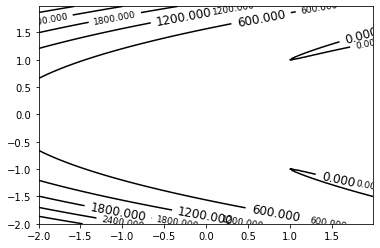

In [174]:
def z_function(x, y):
    return (1-x**3) + 100 * (y**2-x)**2

# List of points in x axis
X,Y     = [] ,[]

# X and Y points are from -6to +6 varying in steps of 2 

X, Y = np.meshgrid(np.arange(-2, +2, 0.005), np.arange(-2, +2, 0.025))
f = (1-X**3) + 100 * (Y**2-X)**2
# Z = np.ndarray((len(X),len(Y))) 
# for x in range(0, len(X)):
#     for y in range(0, len(Y)):
#         Z[x][y] = z_function(x, y)

fig, ax = plt.subplots()
contours = ax.contour(X, Y, f, 6, colors='k')
ax.clabel(contours, fontsize=9)


plt.clabel(contours, inline=1, fontsize=12)

plt.show()

## 2.3

In [175]:
def func_z(x, y):
    return (1-x**3) + (100 * (y**2-x)**2)

def grad_f_x(x, y):
    return (-3*x**2)-(200*(y**2-x))

def grad_f_y(x, y):
    return (400*y)*(y**2-x)

def grad_descent(x0, y0, iters, step_size, mom=False, eps=None):
    
    # starting points
    x, y = [x0], [y0]
    z = [func_z(x0, y0)]
    
    if not mom:
        for i in range(iters):
            x0 = x0 - step_size * grad_f_x(x0, y0)
            y0 = y0 - step_size * grad_f_y(x0, y0)

            x += [x0]
            y += [y0]
            z += [func_z(x0, y0)]
    
    elif mom:
        dx, dy = 0, 0
        for i in range(iters):
        
            dx = (step_size * dx) + (eps * grad_f_y(x0,y0))
            dy = (step_size * dy) + (eps * grad_f_y(x0,y0))

            x0= x0 - dx
            y0 = y0 - dy

            x += [x0]
            y += [y0]
            z += [func_z(x0, y0)]
    
    return x, y, z

def visualizer(lr, iters=1000, mom=False, eps=None):
    x0 = -2
    y0 = 1
    iters = iters    
    x, y, z = grad_descent(x0, y0, iters, lr, mom, eps)
    
    X, Y = np.meshgrid(np.array(x), np.array(y))
    f = (1-X**3) + 100 * (Y**2-X)**2
    
    # plotting
    fig, ax = plt.subplots()
    ax.plot(x, y, 'x')
    countour = ax.contour(X, Y, f, 6, colors='k')
    ax.clabel(countour, fontsize=12)
    
    if not mom:
        plt.title('learning rate (alpha)= {}'.format(lr))
    elif mom:
        plt.title('learning rate (alpha)= {},  eps={}'.format(lr, eps))

    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()    

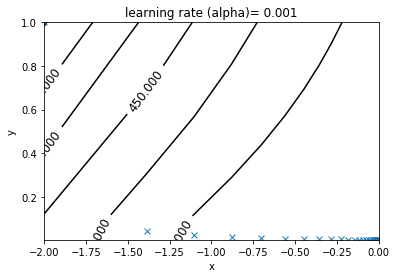

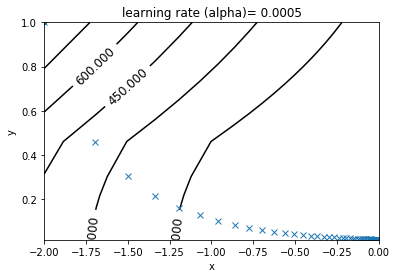

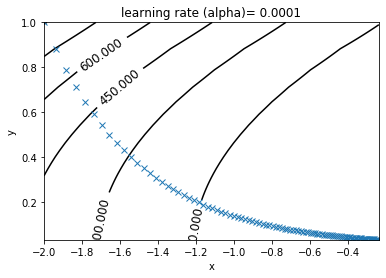

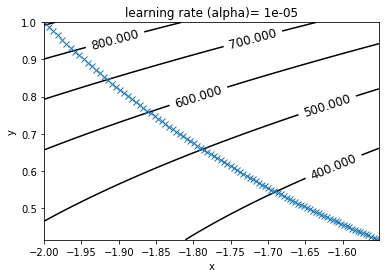

In [176]:
lrs = [0.001,0.0005,0.0001,0.00001]
iters= 100
for lr in lrs:
    visualizer(lr, iters)

## 2.4

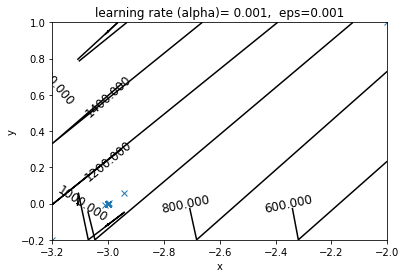

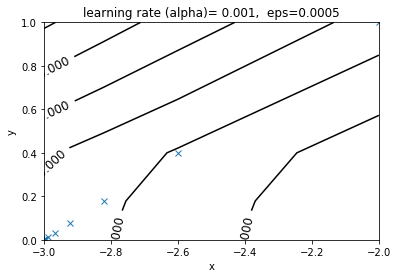

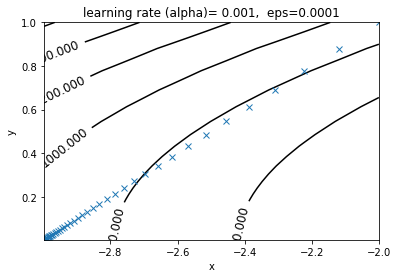

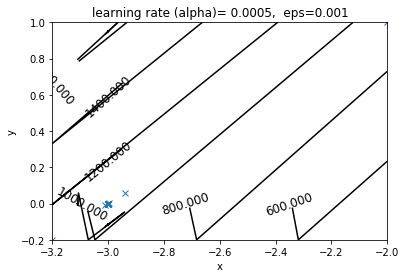

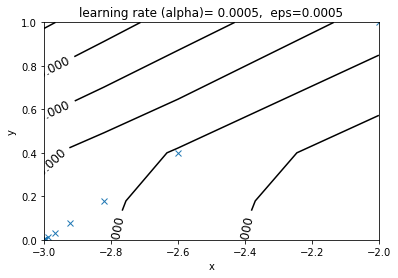

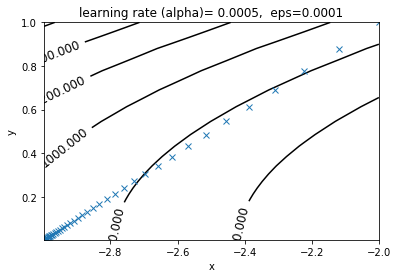

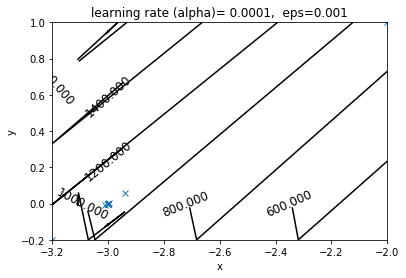

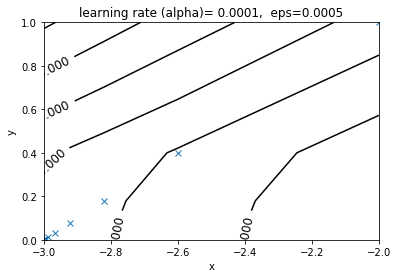

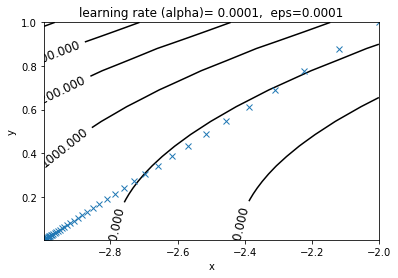

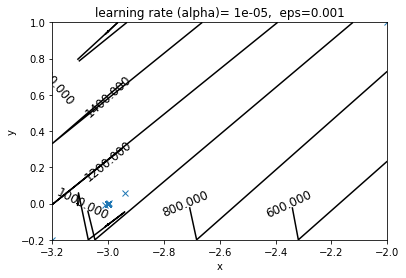

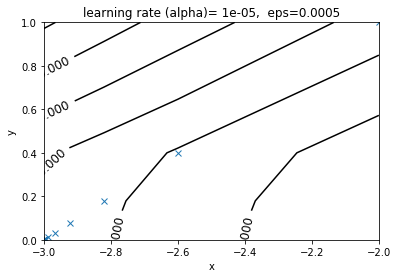

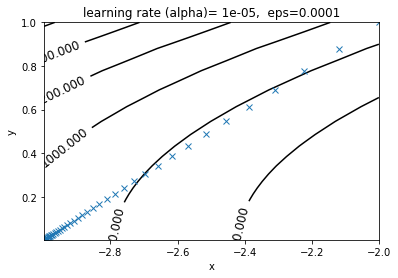

In [177]:
epses = [0.001,0.0005,0.0001]
lrs = [0.001,0.0005,0.0001,0.00001]
iters= 50
for lr in lrs:
    for eps in epses:
        visualizer(lr, iters, mom=True, eps = eps)

# 3. Backprop

# 3.1

The loss function is \textbf{Binary Cross Entropy}:

$L = -y_ilog(\hat{y}_i - (1-y_i)log(1-\hat{y}_i)$

where $y_i$ is the true label, and $\hat{y}_i$ is the predicted label.

Now, derivatives of the gradient of the loss function with respect to each parameter in the model is computed as follows:

$\frac{\partial L}{\partial \hat{y}_{out}} = - (\frac{y_i}{\hat{y}_i} - \frac{1-y_i}{1-\hat{y}_i} )$ 

$\frac{\partial \hat{y}_{out}}{\partial \hat{y}_{in}} = \sigma(\hat{y}_{in}) (1 - \sigma(\hat{y}_{in})) $ (Sigmoid activation function in the output layer)

We have the equation for $\hat{y}_{in}$: $\hat{y}_{in} = v_1h_1 + v_2h_2 + v_3h_3 + c$

$\frac{\partial L}{\partial c} = \frac{\partial L}{\partial \hat{y}_{out}} \frac{\partial \hat{y}_{out}}{\partial \hat{y}_{in}}\frac{\partial \hat{y}_{in}}{\partial c} = \frac{\partial L}{\partial \hat{y}_{out}} \frac{\partial \hat{y}_{out}}{\partial \hat{y}_{in}}$ which are calculated above

$\frac{\partial L}{\partial v_i} = \frac{\partial L}{\partial \hat{y}_{out}} \frac{\partial \hat{y}_{out}}{\partial \hat{y}_{in}}\frac{\partial \hat{y}_{in}}{\partial v_i} = \frac{\partial L}{\partial \hat{y}_{out}}\frac{\partial \hat{y}_{out}}{\partial \hat{y}_{in}} h_{out, i} $ 

and $h_{out, i} = ReLu(h_{in, i})$

\begin{equation}
  \frac{\partial h_{out, i}}{\partial h_{in, i}} =
    \begin{cases}
      1 & h_{in, i}>0\\
      0 & h_{in, i}<=0
    \end{cases}       
\end{equation}

$\frac{\partial L}{\partial b_i}=\frac{\partial L}{\partial \hat{y_{out}}}\frac{\partial \hat{y_{out}}}{\partial \hat{y_{in}}}\frac{\partial \hat{y_{in}}}{\partial h_{out, i}}\frac{\partial h_{out, i}}{\partial h_{in, i}}\frac{\partial h_{in, i}}{\partial b_i}=\frac{\partial L}{\partial \hat{y_{out}}}\frac{\partial \hat{y_{out}}}{\partial \hat{y_{in}}}\frac{\partial \hat{y_{in}}}{\partial h_{out, i}}\frac{\partial h_{out, i}}{\partial h_{in,i}}$

$\frac{\partial L}{\partial W_{ji}}=\frac{\partial L}{\partial \hat{y_{out}}}\frac{\partial \hat{y_{out}}}{\partial \hat{y_{in}}}\frac{\partial \hat{y_{in}}}{\partial h_{out,i}}\frac{\partial h_{out,i}}{\partial h_{in, i}}\frac{\partial h_{in, i}}{\partial W_{ji}}=\frac{\partial L}{\partial \hat{y_{out}}}\frac{\partial \hat{y_{out}}}{\partial \hat{y_{in}}}\frac{\partial \hat{y_{in}}}{\partial h_{out,i}}\frac{\partial h_{out,i}}{dh_{i,in}}a_j$


## 3.2

In [178]:
def loss_func(y, yhat):
    return -(y * np.log(yhat) + (1 - y) * np.log(1 - yhat)).sum(),  -(y/yhat - (1-y)/(1-yhat))

def drelu(x):
    return np.where(x>0, 1, 0)

def grad_f(x, y, model_params):
    W, V, b, c = model_params
    yhat1 = ff_nn_ReLu(x, model_params)
    Loss, dLoss = loss_func(y, yhat1)
    h = ReLu(np.dot(x,W) + b)
    dc = dLoss * sigmoid(np.dot(h, V) + c) * (1 - sigmoid(np.dot(h,V) + c))
    dV = np.dot(dc.T, h).T
    db = np.where(np.dot(x,W) + b>0, 1, 0) * np.dot(dLoss, V.T)
    dW = np.dot(x.T, db)
    return Loss, np.average(dc, axis=0), dV, np.average(db, axis=0), dW

## 3.3

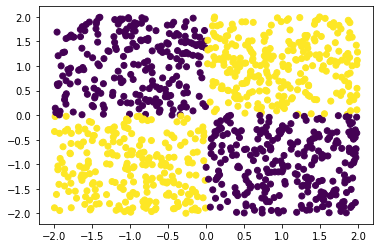

In [204]:
size = 1000

x = np.random.uniform(low=-2,high=2,size=2 * size).reshape((size,2))


# initializing colors with purpule (0)
y = np.zeros(size)

# for + and + data points
y[np.logical_and(x[:, 0]>0 , x[:, 1]>0)] = 1

# for - and - data points
y[np.logical_and(x[:, 0]<0 , x[:, 1]<0)] = 1

plt.scatter(x[:, 0], x[:, 1], c=y)

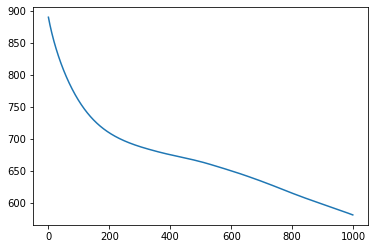

In [211]:
def grad_descent(x, y, model_params, iters, alpha):
    W, V, b, c = model_params
    yhat = ff_nn_ReLu(x, model_params)
    losses = []
    params = np.array([W, V, b, c])
    for i in range(iters):
        Loss, dc, dV, db, dW = grad_f(x, y, model_params)
        losses.append(Loss)
        grads = np.array([dW, dV, db, dc])
        params = params - grads * alpha
        model_params = params
    return losses, model_params


W = np.random.uniform(size=6).reshape(2,3)
V = np.random.uniform(size=3).reshape(3,1)
b = np.random.uniform(size=3).reshape(1,3)
c = np.random.uniform(size=1).reshape(1,1)
    
iters = 1000
learning_rate = 0.00001
Y = np.where(y, 1, 0).reshape(1000,1)
model_params = (W, V, b, c)
loss, _ = grad_descent(x, Y, model_params, iters, learning_rate)
plt.plot(loss,'-')

## 4.5

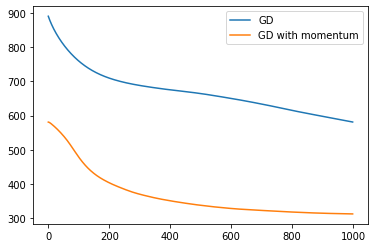

In [223]:
def gradient_descent_momentum(x,y, model_params,iters,learning_rate, eps):
    W, V, b, c = model_params
    yhat = ff_nn_ReLu(x, model_params)
    losses = []
    params = np.array([W,V,b,c])
    Velocity = np.array([np.zeros(W.shape), np.zeros(V.shape), np.zeros(b.shape), np.zeros(c.shape)])
    for i in range(iters):
        Loss, dc, dV, db, dW = grad_f(x,y, model_params)
        losses.append(Loss)
        grads = np.array([dW, dV, db, dc])
        Velocity = eps * Velocity + learning_rate * grads
        params = params - Velocity
        model_params = params
    return losses, params

iters = 1000
learning_rate = 0.00001
eps = 0.75
Y = np.where(y, 1, 0).reshape(1000,1)
model_params = (W, V, b, c)
loss, model_params = grad_descent(x, Y, model_params, iters, learning_rate)
loss_mom, model_params_mom = gradient_descent_momentum(x, Y, model_params, iters, learning_rate, eps)
plt.plot(loss,'-', label = 'GD')
plt.plot(loss_mom, '-', label = 'GD with momentum')
plt.legend(loc = "upper right")


As indicated, Gradient descent with momentum performs more effieciently!

## 3.5

Text(0.5, 1.0, 'Desicion Boundary with Gradient Decent')

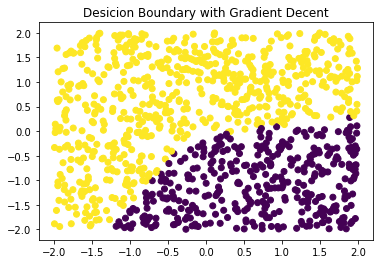

In [224]:
# we visualize with the model parameters that have been learnt during gradient descent w/ momentum

yhat = ff_nn_ReLu(x, model_params)
yhat = np.where(yhat >= 0.5, 1, 0)
plt.scatter(x[:,0],x[:,1],c=yhat.reshape(1000))
plt.title('Desicion Boundary with Gradient Decent')


Text(0.5, 1.0, 'Desicion Boundary with Gradient Decent (+Momentum)')

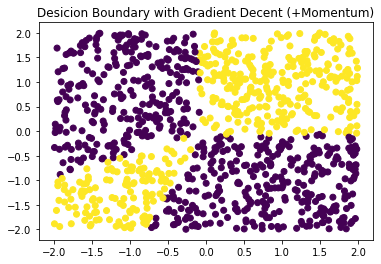

In [225]:
yhat = ff_nn_ReLu(x, model_params_mom)
yhat = np.where(yhat >= 0.5, 1, 0)
plt.scatter(x[:,0],x[:,1],c=yhat.reshape(1000))
plt.title('Desicion Boundary with Gradient Decent (+Momentum)')